Dataset with missing values:
    Age   income Education_Level  Purchased
0  23.0  50000.0        Bachelor          1
1  45.0  60000.0          Master          0
2   NaN  55000.0             NaN          1
3  35.0      NaN             PhD          0
4  62.0  65000.0        Bachelor          1
5   NaN  62000.0          Master          1
6  41.0      NaN             PhD          0
7  29.0  58000.0             NaN          1
8  33.0  59000.0        Bachelor          0
9  50.0  61000.0          Master          1

Accuracy of Decision Tree: 0.33


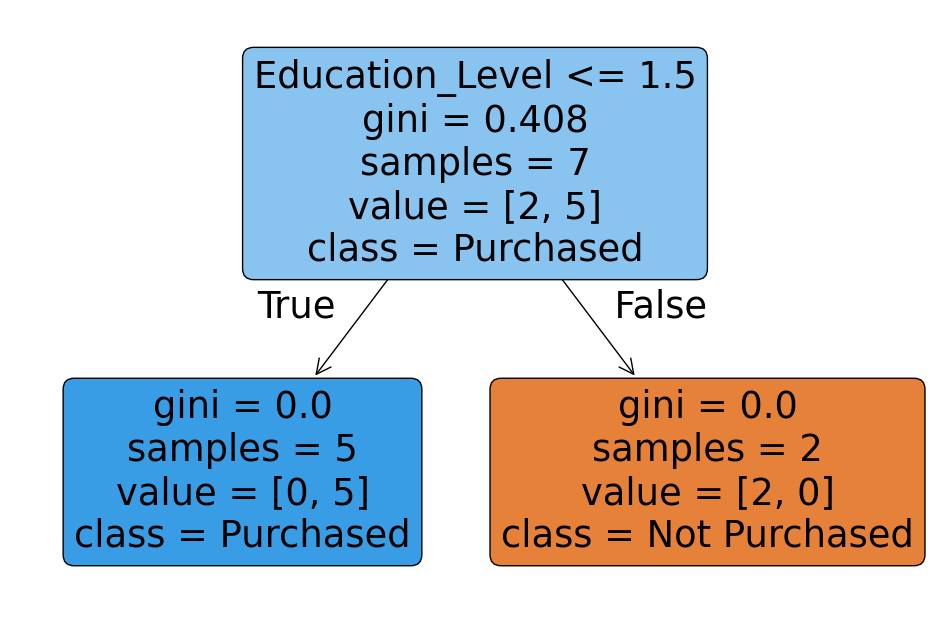

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Step 1: Create the dataset
np.random.seed(0)
data = {
    'Age': [23, 45, np.nan, 35, 62, np.nan, 41, 29, 33, 50],
    'income': [50000, 60000, 55000, np.nan, 65000, 62000, np.nan, 58000, 59000, 61000],
    'Education_Level': ['Bachelor', 'Master', np.nan, 'PhD', 'Bachelor', 'Master', 'PhD', np.nan, 'Bachelor', 'Master'],
    'Purchased': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
print("Dataset with missing values:")
print(df)

# Step 2: Handle missing values
imputer_num = SimpleImputer(strategy='mean')
df[['Age', 'income']] = imputer_num.fit_transform(df[['Age', 'income']])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Education_Level']] = imputer_cat.fit_transform(df[['Education_Level']])

# Step 3: Encode categorical variables
label_encoder = LabelEncoder()
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])

# Step 4: Split features and target
X = df[['Age', 'income', 'Education_Level']]
y = df['Purchased']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Decision Tree: {accuracy:.2f}")

plt.figure(figsize=(12,8))
plot_tree(model, 
          feature_names=['Age','income','Education_Level'], 
          class_names=['Not Purchased','Purchased'], 
          filled=True, rounded=True) 
plt.show()